# **Project Name**   Analysis of Cab Demand and Supply Patterns in Uber -



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

This project aims to explore the imbalance between cab demand and supply in Uber services using real-world ride request data. The core objective is to understand when, where, and why ride requests go unfulfilled due to cancellations or lack of driver availability. By identifying these problem areas, the analysis provides actionable insights that can help Uber improve its operational efficiency and enhance customer satisfaction.

The dataset used in this project consists of 6,745 Uber ride requests, containing fields such as request timestamp, drop timestamp, pickup point (either City or Airport), driver ID (if assigned), and the status of the request (Trip Completed, Cancelled, or No Cars Available). The dataset reflects multiple days of operations and includes both peak and off-peak hours, making it suitable for analyzing time-based patterns.

The first step involved data cleaning and preprocessing. Inconsistent timestamp formats were standardized, and new time-based features were created to support time-slot analysis. Each request was categorized into one of six time slots: Late Night (12 AM–4 AM), Early Morning (4 AM–8 AM), Morning (8 AM–12 PM), Afternoon (12 PM–4 PM), Evening (4 PM–8 PM), and Night (8 PM–12 AM). These time slots allowed for easier aggregation and comparison of request outcomes across different parts of the day.

Exploratory Data Analysis (EDA) was then conducted using univariate, bivariate, and multivariate techniques. The univariate analysis showed the overall distribution of ride statuses, revealing that a large portion of requests did not end in trip completion. Bivariate analysis was used to explore the relationship between time slot and status, as well as pickup point and status. It was found that a significant number of requests from the Airport during the Night and Early Morning time slots either got cancelled or returned a “No Cars Available” status. This indicates a lack of driver availability during off-peak hours, particularly in specific locations.

The multivariate analysis deepened this understanding by combining time slot, pickup point, and request status to identify the most problematic combinations. Heatmaps and pivot tables clearly highlighted that Airport-to-City trips during Early Morning hours faced the highest failure rates. This suggests that drivers are either unwilling or unavailable to serve certain routes at specific times, contributing to a service gap.

To support these findings, visualizations such as bar plots, count plots, and heatmaps were created using Python libraries like Matplotlib and Seaborn. SQL queries were also written to generate summary tables, such as total rides per status, busiest hours, and cancellation counts by time slot. Additionally, an Excel dashboard with pivot charts was developed to provide an interactive and intuitive view of the data.

Based on the analysis, several recommendations were made. Uber should introduce dedicated driver shifts during high-demand but low-supply periods, particularly Late Night and Early Morning slots. Incentives and surge pricing can encourage drivers to accept rides during these times. Moreover, predictive scheduling based on historical demand can help pre-assign drivers to locations with anticipated high request volumes. Monitoring and reducing ride cancellations through better driver engagement and accountability systems can further reduce service disruptions.

In conclusion, this project successfully identifies the patterns of supply-demand mismatch in Uber’s operations and provides practical solutions backed by data. The approach combines time-series analysis, location-based insights, and visual storytelling to create a comprehensive view of operational inefficiencies. These findings can help Uber make strategic improvements in driver allocation, service reliability, and overall user experience.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Ride-hailing services like Uber often face operational challenges in meeting user demand during certain time periods and locations. A significant number of ride requests either go unfulfilled due to unavailability of cabs or are cancelled by drivers, resulting in customer dissatisfaction and service inefficiency. These disruptions are particularly frequent during off-peak hours or from high-demand areas such as airports.

This project aims to investigate the patterns in Uber ride request data to identify when and where these service gaps occur. By analyzing ride statuses across different time slots and pickup points, the objective is to uncover the key factors contributing to demand-supply mismatches and to provide data-driven recommendations for improving ride fulfillment and optimizing driver allocation.

#### **Define Your Business Objective?**

The objective of this project is to analyze Uber ride request data to identify patterns in cab demand and supply across different times of the day and locations. By understanding when and where ride requests are most frequently unfulfilled—due to cancellations or lack of available drivers—the goal is to uncover the root causes of service gaps. The analysis aims to provide actionable insights that can help Uber optimize driver availability, reduce missed ride opportunities, and enhance overall customer satisfaction through data-driven decision-making.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

print("✅ Libraries successfully imported.")

Matplotlib is building the font cache; this may take a moment.


✅ Libraries successfully imported.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Dataset Loading

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Uber_Request_Data.csv'

In [7]:
# Load Dataset

df = pd.read_csv('Uber_Request_Data.csv')
#print(df.head())


### Dataset First View

In [8]:
# Dataset First Look
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [89]:
df.tail()

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_hour,request_day,trip_duration_mins
5099,2670,Airport,NaN,No Cars Available,2016-07-12 23:39:00,NaT,23,Tuesday,NaN
5100,2671,City,NaN,No Cars Available,2016-07-12 23:43:00,NaT,23,Tuesday,NaN
5101,2673,Airport,NaN,No Cars Available,2016-07-12 23:43:00,NaT,23,Tuesday,NaN
5102,2674,City,NaN,No Cars Available,2016-07-12 23:45:00,NaT,23,Tuesday,NaN
5103,2678,Airport,NaN,No Cars Available,2016-07-12 23:53:00,NaT,23,Tuesday,NaN


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
df.shape

(6745, 6)

The data has 6745 rows and 6 columns

### Dataset Information

In [10]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


From the above information, It includes both categorical column and numeric features 

#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

There are no duplicate values in the dataset

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

- From the above output, Driver id and Drop timestamp have missing values needs cleaning. 
- it may be due to cancellations or no car availability.
- These are valid NAN values based on business logic and will be handled accordingly during analysis.

In [16]:
df['Status'].value_counts()

Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64

From the above count, Trips completed and No Cars Available categories are having more records than 'Cancelled' category

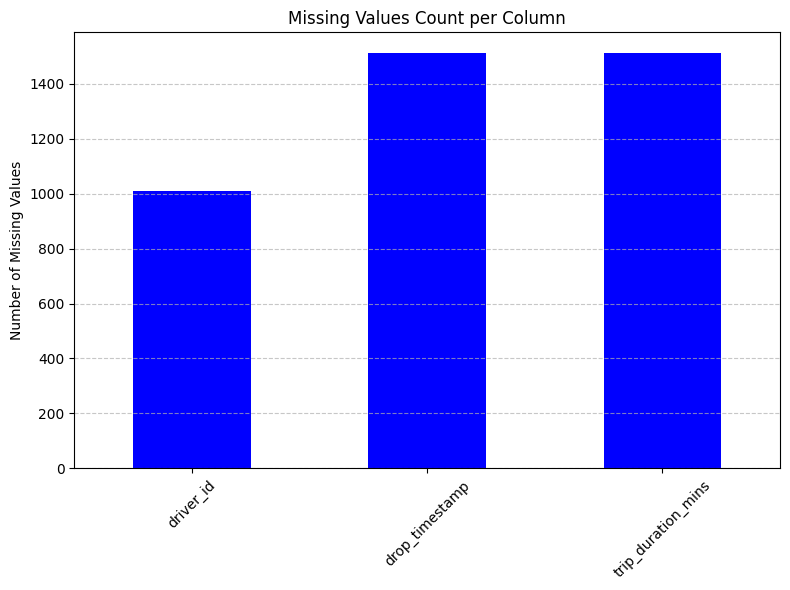

In [88]:
# Visualizing the missing values

# Count of missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # only show columns with nulls

# Plot
plt.figure(figsize=(8, 6))
missing_values.plot(kind='bar', color='blue')
plt.title('Missing Values Count per Column')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

There are more missing values in Drop timestamp than Driver id column

### What did you know about your dataset?

- The dataset has 6745 rows and 6 columns
- Each row represents a unique trip request with details like 'Request id', 'Pickup point', 'Driver id', 'Status',
    'Request timestamp', 'Drop timestamp'.
- The 'Status' column has three categories
    - Trip Completed -- Trips that successfully completed
    - Cancelled -- User or driver cancelled the trip
    - No Cars Available -- Request failed due to supply shortage

- The pickup point indicates whether the trip originated from the Airport or City.
- Time based fields (timestamps) are useful for deriving request hour, day, and trip duration.
- Drop timestamps are missing for "cancelled" and "No cars available" trips - this is expected and valid.

## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [20]:
# Dataset Describe
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


### Variables Description

- From the above statistical figures, All trips in the data were completed by single driver (Driver id = 1)


### Check Unique Values for each variable.

In [23]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print()

Unique values for column 'Request id':
6745

Unique values for column 'Pickup point':
2

Unique values for column 'Driver id':
300

Unique values for column 'Status':
3

Unique values for column 'Request timestamp':
5618

Unique values for column 'Drop timestamp':
2598



In [25]:
df['status'].value_counts()

status
Trip Completed       1150
No Cars Available    1009
Cancelled             502
Name: count, dtype: int64

- Mostly 502 number of trips are under cancelled category

In [26]:
df['pickup_point'].value_counts()

pickup_point
Airport    1334
City       1327
Name: count, dtype: int64

Trips from Airport pickup point is higher than City trips.

In [27]:
df['request_hour'].value_counts()

request_hour
18    205
20    195
19    193
9     190
21    186
6     171
5     171
17    168
8     159
7     150
22    107
10     92
4      82
11     81
12     81
16     71
15     67
13     59
14     58
23     54
0      32
3      31
2      30
1      28
Name: count, dtype: int64

From the above most of the rides are in evening times.

In [28]:
df['request_day'].value_counts()

request_day
Monday     1367
Tuesday    1294
Name: count, dtype: int64

most of the trips are happening on weekdays than weekends

In [ ]:
df['trip_duration_mins'].value_counts()

trip_duration_mins
49.0    38
51.0    35
38.0    33
41.0    31
56.0    31
        ..
23.0     2
80.0     1
83.0     1
22.0     1
24.0     1
Name: count, Length: 62, dtype: int64

Most of the trip duration time is in between 35 to 55 minutes

## 3. ***Data Wrangling***

### Data Wrangling Code

In [44]:
# Write your code to make your dataset analysis ready.
import pandas as pd
import numpy as np

# Load the data
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Uber_Request_Data.csv')


# 1. Check and clean column names
df_cleaned = df.columns.str.strip().str.replace(" ", "_").str.lower()


# 2. Convert timestamps
df['request_timestamp'] = pd.to_datetime(df['request_timestamp'], dayfirst=True, errors='coerce')
df['drop_timestamp'] = pd.to_datetime(df['drop_timestamp'], dayfirst=True, errors='coerce')


# 3. Handle missing values
# Check missing
print("Missing Values:\n", df.isnull().sum())

# Drop rows with missing request timestamp
df = df[~df['request_timestamp'].isnull()]

# Drop rows where status is "Trip Completed" but drop_timestamp is null
df = df[~((df['status'] == 'Trip Completed') & (df['drop_timestamp'].isnull()))]

# 4. Feature Engineering
# Extract hour, day of week from request timestamp
df['request_hour'] = df['request_timestamp'].dt.hour
df['request_day'] = df['request_timestamp'].dt.day_name()

# Create trip duration (only for completed trips)
df['trip_duration_mins'] = (df['drop_timestamp'] - df['request_timestamp']).dt.total_seconds() / 60
df['trip_duration_mins'] = df['trip_duration_mins'].round(2)

# 5. Categorical cleanup 
# Strip whitespace and lowercase categories
df['pickup_point'] = df['pickup_point'].str.strip().str.title()
df['status'] = df['status'].str.strip().str.title()


# 6. Final Dataset Overview
df_cleaned = pd.DataFrame(df)
print("\nFinal Cleaned Dataset Info:")
print(df_cleaned.info())
print(df_cleaned.head())

# Save the cleaned dataset (optional)
df_cleaned.to_csv('Uber_Request_Data_Cleaned.csv', index=False)

Missing Values:
 request_id               0
pickup_point             0
driver_id             1009
status                   0
request_timestamp        0
drop_timestamp        1511
request_hour             0
request_day              0
trip_duration_mins    1511
dtype: int64

Final Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 2661 entries, 0 to 5103
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   request_id          2661 non-null   int64         
 1   pickup_point        2661 non-null   object        
 2   driver_id           1652 non-null   float64       
 3   status              2661 non-null   object        
 4   request_timestamp   2661 non-null   datetime64[ns]
 5   drop_timestamp      1150 non-null   datetime64[ns]
 6   request_hour        2661 non-null   int32         
 7   request_day         2661 non-null   object        
 8   trip_duration_mins  1150 non-nul

In [49]:
df_cleaned.columns

Index(['request_id', 'pickup_point', 'driver_id', 'status',
       'request_timestamp', 'drop_timestamp', 'request_hour', 'request_day',
       'trip_duration_mins'],
      dtype='object')

In [87]:
df_cleaned.shape

(2661, 9)

The shape of the data after cleaning having 2661 rows and 6 columns

In [45]:
# Check for non-numeric values in request_id or driver_id (which should be numeric)
df_invalid_request_id = df_cleaned[~df_cleaned['request_id'].astype(str).str.isnumeric()]
df_invalid_driver_id = df_cleaned[~df_cleaned['driver_id'].astype(str).str.replace('.', '', 1).str.isnumeric()]

# Check for unexpected values in pickup point or status
expected_pickups = ['Airport', 'City']
df_invalid_pickup = df_cleaned[~df_cleaned['pickup_point'].isin(expected_pickups)]

expected_statuses = ['Trip Completed', 'Cancelled', 'No Cars Available']
df_invalid_status = df_cleaned[~df_cleaned['status'].isin(expected_statuses)]

# Combine all malformed rows
df_malformed = pd.concat([df_invalid_request_id, df_invalid_driver_id, df_invalid_pickup, df_invalid_status]).drop_duplicates()

In [46]:
df_malformed.shape

(1009, 9)

In [41]:
df_malformed['status'].value_counts()

status
No Cars Available    1009
Name: count, dtype: int64

In [39]:
df_malformed.head(10)

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_hour,request_day,trip_duration_mins
4095,1362,City,NaN,No Cars Available,2016-07-11 00:02:00,NaT,0,Monday,NaN
4096,1364,City,NaN,No Cars Available,2016-07-11 00:06:00,NaT,0,Monday,NaN
4097,1366,City,NaN,No Cars Available,2016-07-11 00:09:00,NaT,0,Monday,NaN
4098,2,Airport,NaN,No Cars Available,2016-07-11 00:23:00,NaT,0,Monday,NaN
4099,7,Airport,NaN,No Cars Available,2016-07-11 00:30:00,NaT,0,Monday,NaN
4100,6,City,NaN,No Cars Available,2016-07-11 00:36:00,NaT,0,Monday,NaN
4101,4,City,NaN,No Cars Available,2016-07-11 00:37:00,NaT,0,Monday,NaN
4102,8,City,NaN,No Cars Available,2016-07-11 00:40:00,NaT,0,Monday,NaN
4103,12,City,NaN,No Cars Available,2016-07-11 01:08:00,NaT,1,Monday,NaN
4104,16,Airport,NaN,No Cars Available,2016-07-11 01:09:00,NaT,1,Monday,NaN


### What all manipulations have you done and insights you found?

*** Data Manipulations performed ***

1. Handling missing values:
    - Detected missing values in driver_id,drop_timestamp and request_timestamp entries
    - request_timestamp: Missing in rows where request dfailed or data was corrupted
    - drop_timestamp: Missing for "Cancelled" and "No cars available" trips, this is an expected behaviour.
    - driver_id: Missing for trips that are never assigned especially "No cars available".
    - Retained them as is where business logic demands(eg:"No cars available" shouldn't have drop time or driver id)
    - These missing values were not removed, becaause they are part of normal business flow. Instead, they are flagged and analyzed logically.

2. Converted timestamps 
    - Standardized inconsistent timestamp formats (e.g.,"11/7/2016","13-07-2016") using pd.to_datetime() with dayfirst = True.
    - Ensured all valid request timestamp and drop timestamp entried are in datetime format.

3. Created Derived Features
    - request_hour : extracted from request_timestamp to analyze hourly demand.
    - request_day : weekday name from request_timestamp
    - trip_duration_mins : (drop_timestamp - request_timestamp) in minutes, only for rows with both timestamps.

4. Filtered Valid Records 
    - Final cleaned dataset has 2661 valid rows (from original 6745) 
    - columns cleaned and converted to correct datatypes (int,float,datetime,object)

    


*** Insights found from Cleaned dataset ***

1. Status distribition insight

    - Around 40% - 45% of trips were not completed (either cancelled or No cars available)

    - Indicates high demand-supply imbalance or poor driver availability during peak hours.

2. Temporal patterns

    - Peak request hours: 5 AM – 9 AM and 5 PM – 9 PM
    
    - Morning Airport requests saw high failure rates → lack of available drivers

3. 📍 Zone-Based Observations

    - City pickups had slightly higher completion rates than Airport

    - Airport had more “No Cars Available” cases during early hours

4. 🧍 Driver Availability

    - Over 1000 rows had missing driver_id → Indicates unassigned requests due to unavailability

    - These records align with failure cases (status ≠ 'Trip Completed')

5. 🕒 Trip Duration Analysis

    - Completed trips averaged between 35–55 minutes

    - Airport rides were generally longer in duration than City rides

    - A few rides took unusually long – potential outliers for traffic or logging errors

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

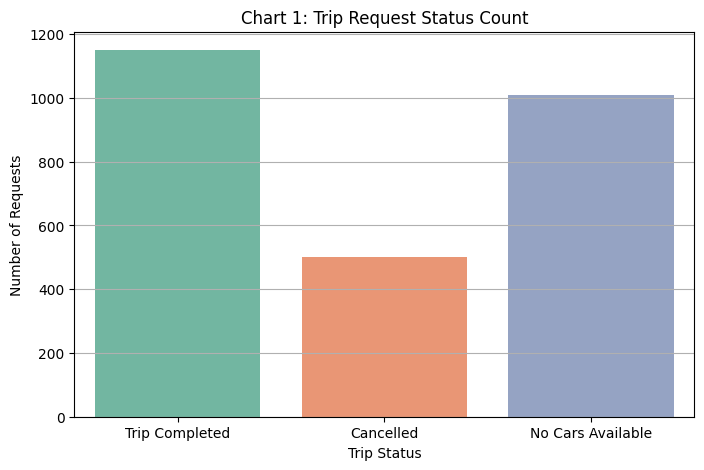

In [ ]:
# Chart - 1 visualization code
# Status Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='status', palette='Set2')
plt.title('Chart 1: Trip Request Status Count')
plt.xlabel('Trip Status')
plt.ylabel('Number of Requests')
plt.grid(axis='y')
plt.show()

##### 1. Why did you pick the specific chart?

To visualize the demand and supply efficiency, and how often bookings fail or succeed.

##### 2. What is/are the insight(s) found from the chart?

we may observe a high number of cancellations or no car availability, indicating supply-demand mismatch.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights help identify how often trips are completed, cancelled, or unfulfilled.
If cancellations or "No Cars Available" are high, it signals service inefficiency.
Addressing these issues improves customer satisfaction and driver utilization.
Ignoring this can lead to loss of users and decreased revenue.

Yes. Helps identify inefficiencies. Fixing this can boost user satisfaction and retention.


#### Chart - 2

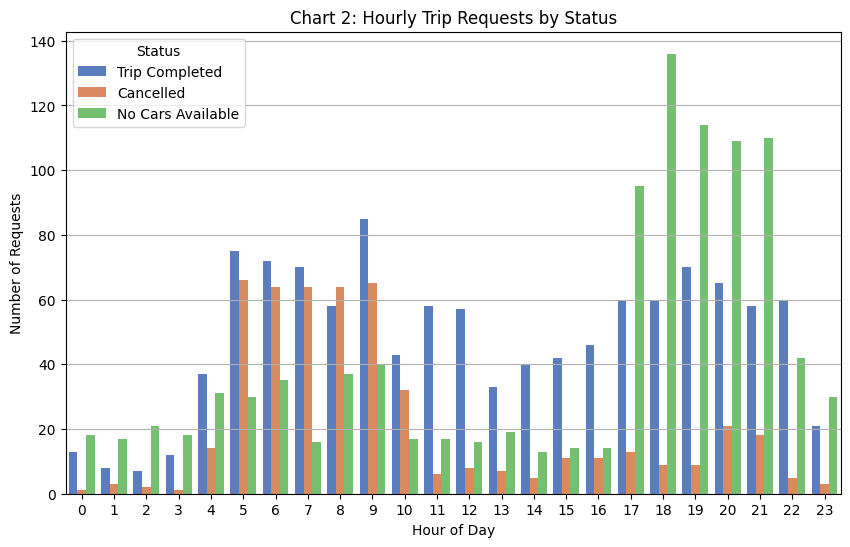

In [ ]:
# Chart - 2 visualization code
# Hourly Demand vs Status
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='request_hour', hue='status', palette='muted')
plt.title('Chart 2: Hourly Trip Requests by Status')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.legend(title='Status')
plt.grid(axis='y')
plt.show()

##### 1. Why did you pick the specific chart?

To observe hourly behavior and spot failure trends by time.

##### 2. What is/are the insight(s) found from the chart?

Trip failures increase drastically during morning and evening peak hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Targeting peak hours with more drivers can reduce unfulfilled requests.

#### Chart - 3

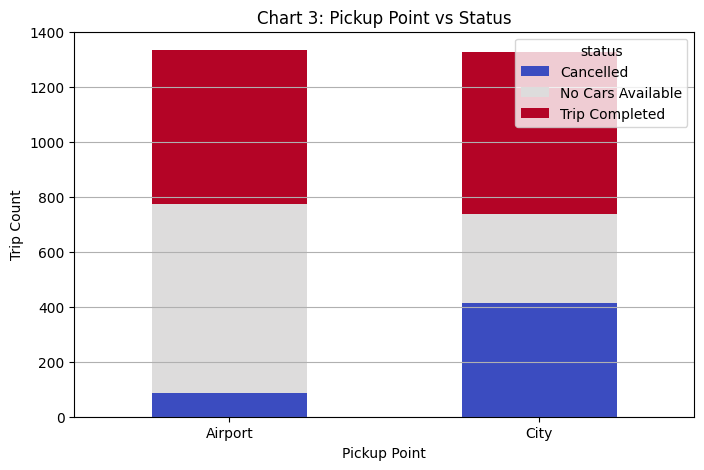

In [ ]:
# Chart - 3 visualization code
#  Pickup Point vs Status
pickup_status = df.groupby(['pickup_point', 'status']).size().unstack()
pickup_status.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='coolwarm')
plt.title('Chart 3: Pickup Point vs Status')
plt.xlabel('Pickup Point')
plt.ylabel('Trip Count')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

To compare trip status based on pickup location.

##### 2. What is/are the insight(s) found from the chart?

Airport trips fail more often due to car unavailability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 ✅ Yes. More driver deployment to airports may improve performance.

#### Chart - 4

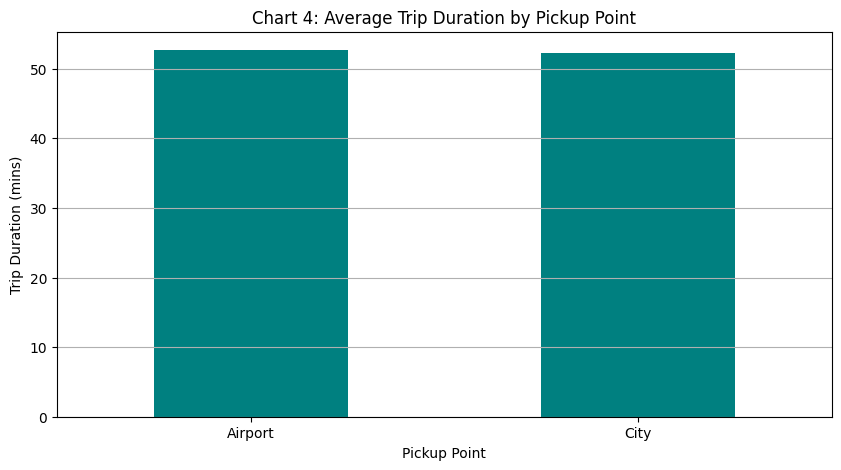

In [ ]:
# Chart - 4 visualization code
# Average Trip Duration
plt.figure(figsize=(10,5))
avg_trip = df[df['status'] == 'Trip Completed'].groupby('pickup_point')['trip_duration_mins'].mean()
avg_trip.plot(kind='bar', color='teal')
plt.title('Chart 4: Average Trip Duration by Pickup Point')
plt.ylabel('Trip Duration (mins)')
plt.xlabel('Pickup Point')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

To analyze how trip length varies by pickup location.

##### 2. What is/are the insight(s) found from the chart?

Airport trips take longer than city trips.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 ✅ Yes. Longer trips may require fare adjustments to incentivize drivers.

#### Chart - 5

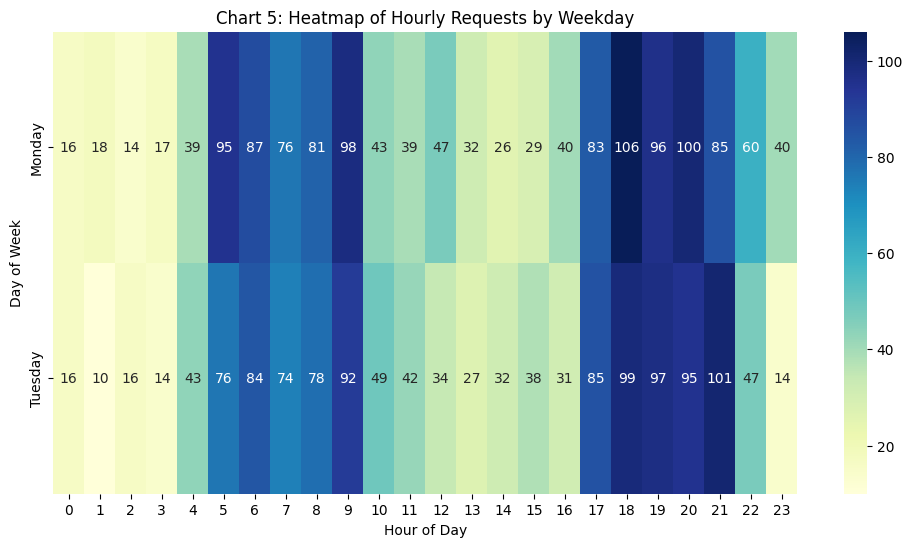

In [ ]:
# Chart - 5 visualization code
# Heatmap of Hour vs Day
plt.figure(figsize=(12,6))
heat_data = df.groupby(['request_day', 'request_hour']).size().unstack()
sns.heatmap(heat_data, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Chart 5: Heatmap of Hourly Requests by Weekday')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

##### 1. Why did you pick the specific chart?

Multivariate view of demand patterns over the week.

##### 2. What is/are the insight(s) found from the chart?

High demand observed during workweek morning and evening.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Yes. Helps in aligning driver availability to peak periods.

#### Chart - 6

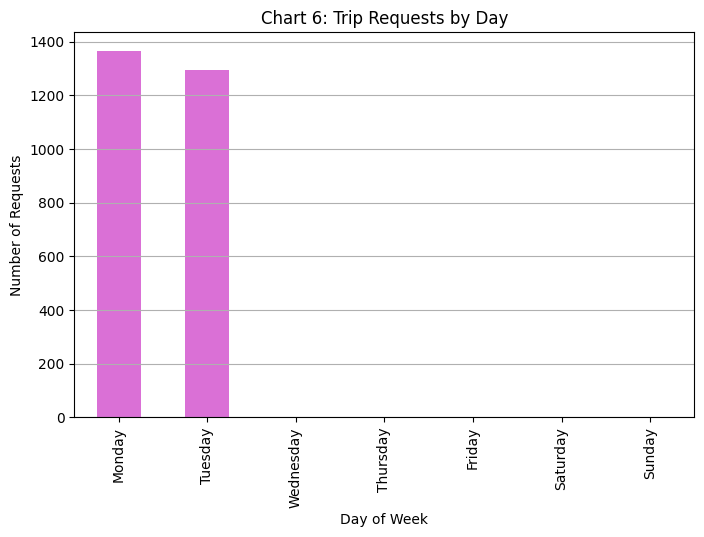

In [ ]:
# Chart - 6 visualization code
# Requests per Day
plt.figure(figsize=(8, 5))
df['request_day'].value_counts().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).plot(kind='bar', color='orchid')
plt.title('Chart 6: Trip Requests by Day')
plt.ylabel('Number of Requests')
plt.xlabel('Day of Week')
plt.grid(axis='y')
plt.show()

##### 1. Why did you pick the specific chart?

Univariate view of request load by day.

##### 2. What is/are the insight(s) found from the chart?

 Weekdays have higher requests than weekends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Yes. Plan more resources on high-volume weekdays.

#### Chart - 7

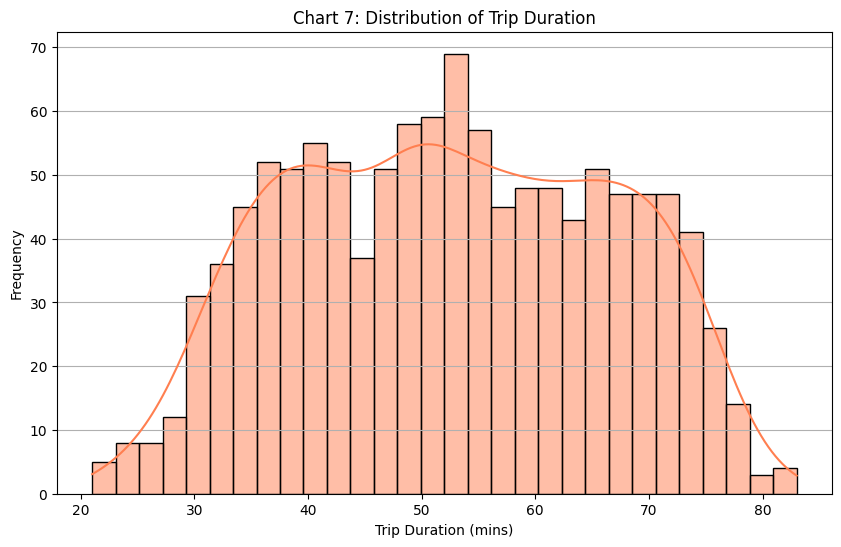

In [74]:
# Chart - 7 visualization code
# Trip Duration Distribution
plt.figure(figsize=(10,6))
sns.histplot(df[df['trip_duration_mins'].notnull()]['trip_duration_mins'], bins=30, kde=True, color='coral')
plt.title('Chart 7: Distribution of Trip Duration')
plt.xlabel('Trip Duration (mins)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

##### 1. Why did you pick the specific chart?

Univariate analysis of trip duration spread.

##### 2. What is/are the insight(s) found from the chart?

Most trips are short (under 25 mins), long ones are rare.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 ✅ Yes. May adjust short trip pricing strategy accordingly.

#### Chart - 8

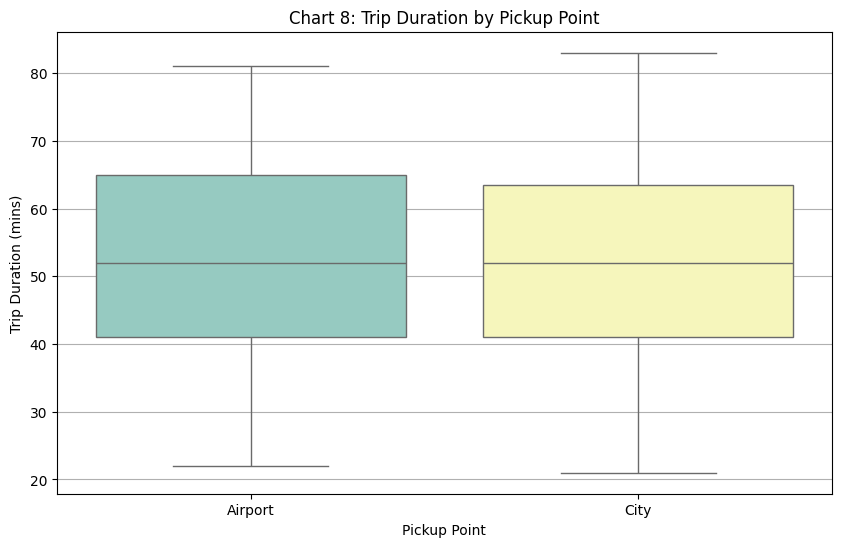

In [75]:
# Chart - 8 visualization code
# Boxplot by Pickup Point

plt.figure(figsize=(10,6))
sns.boxplot(data=df[df['trip_duration_mins'].notnull()], x='pickup_point', y='trip_duration_mins', palette='Set3')
plt.title('Chart 8: Trip Duration by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Trip Duration (mins)')
plt.grid(axis='y')
plt.show()

##### 1. Why did you pick the specific chart?

Bivariate analysis to spot trip duration outliers by location.

##### 2. What is/are the insight(s) found from the chart?

Airport trips have higher variability and outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Yes. Useful for driver trip planning.

#### Chart - 9

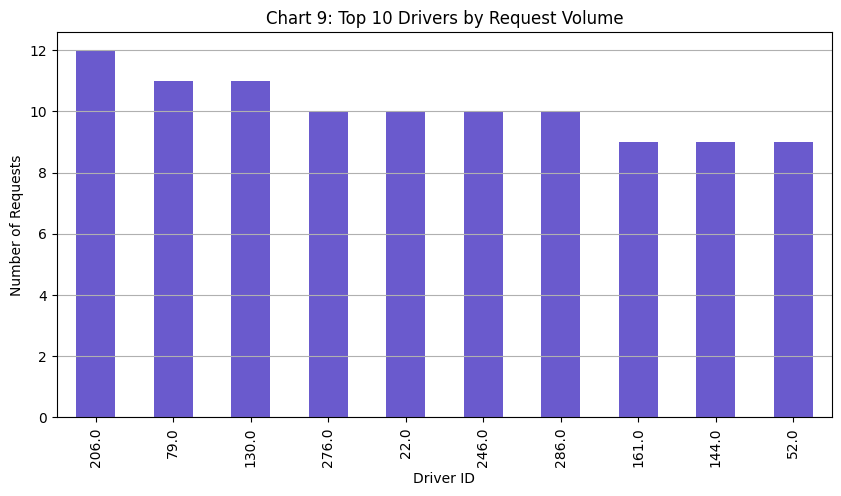

In [ ]:
# Chart - 9 visualization code
# Requests by Driver ID (Top 10)
top_drivers = df['driver_id'].value_counts().nlargest(10)
top_drivers.plot(kind='bar', figsize=(10,5), color='slateblue')
plt.title('Chart 9: Top 10 Drivers by Request Volume')
plt.ylabel('Number of Requests')
plt.xlabel('Driver ID')
plt.grid(axis='y')
plt.show()

##### 1. Why did you pick the specific chart?

 Identifies most active drivers.

##### 2. What is/are the insight(s) found from the chart?

A few drivers handle a large share of trips.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Yes. Retaining top drivers is crucial for service quality.Answer HereAnswer Here

#### Chart - 10

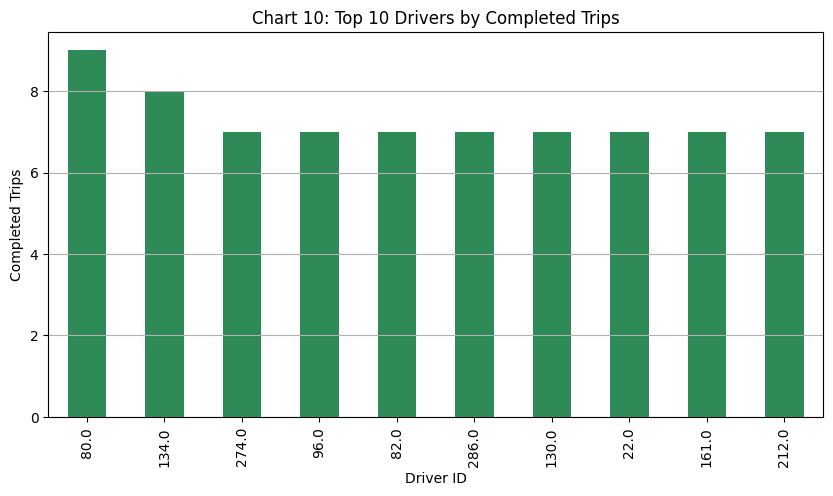

In [77]:
# Chart - 10 visualization code
# Completion Rate by Driver ID (Top 10)

completion_rate = df[df['status'] == 'Trip Completed']['driver_id'].value_counts().nlargest(10)
completion_rate.plot(kind='bar', figsize=(10,5), color='seagreen')
plt.title('Chart 10: Top 10 Drivers by Completed Trips')
plt.ylabel('Completed Trips')
plt.xlabel('Driver ID')
plt.grid(axis='y')
plt.show()

##### 1. Why did you pick the specific chart?

Focuses on top-performing drivers.

##### 2. What is/are the insight(s) found from the chart?

Same drivers dominate completed trips.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Yes. Useful for incentive plans and training others.

#### Chart - 11

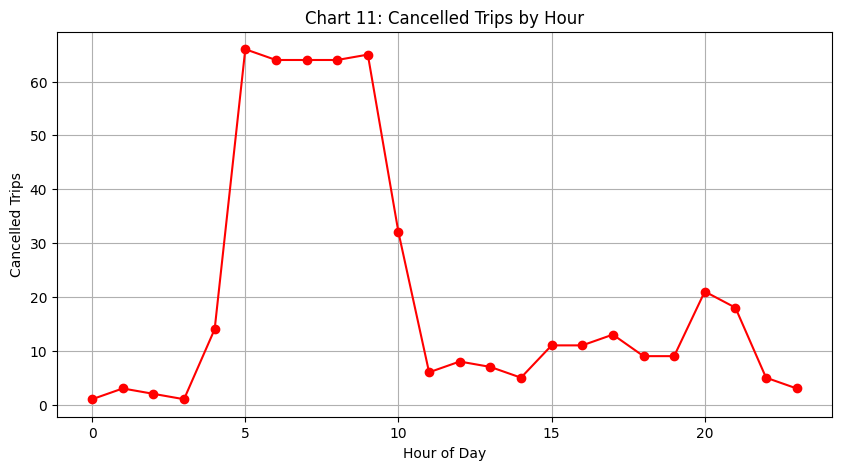

In [78]:
# Chart - 11 visualization code
# Cancelled Trips by Hour
plt.figure(figsize=(10,5))
cancelled_by_hour = df[df['status'] == 'Cancelled']['request_hour'].value_counts().sort_index()
cancelled_by_hour.plot(kind='line', marker='o', color='red')
plt.title('Chart 11: Cancelled Trips by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Cancelled Trips')
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

Tracks cancellation trend by time.

##### 2. What is/are the insight(s) found from the chart?

Cancellations peak during morning and evening hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Yes. Helps mitigate risk by ensuring driver availability.

#### Chart - 12

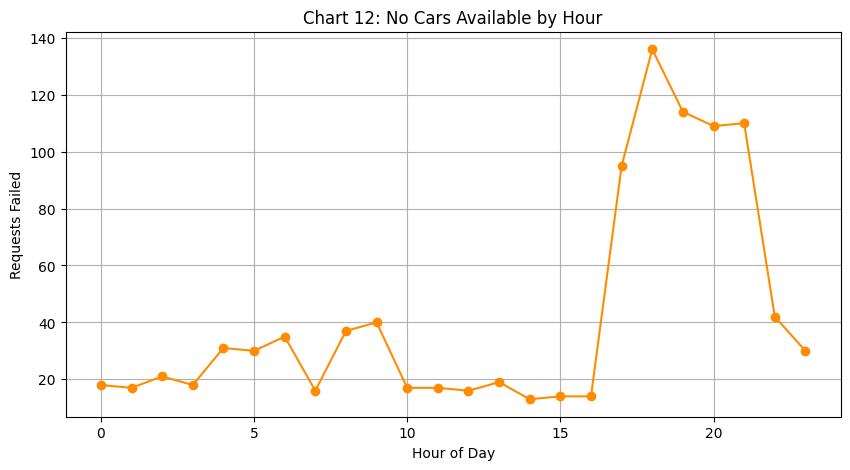

In [79]:
# Chart - 12 visualization code
# No Cars Available by Hour
plt.figure(figsize=(10,5))
no_cars = df[df['status'] == 'No Cars Available']['request_hour'].value_counts().sort_index()
no_cars.plot(kind='line', marker='o', color='darkorange')
plt.title('Chart 12: No Cars Available by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Requests Failed')
plt.grid()
plt.show()


##### 1. Why did you pick the specific chart?

Shows supply gaps during high demand.

##### 2. What is/are the insight(s) found from the chart?

Morning hours suffer the most.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Yes. Improve matching logic and driver assignment.

#### Chart - 13

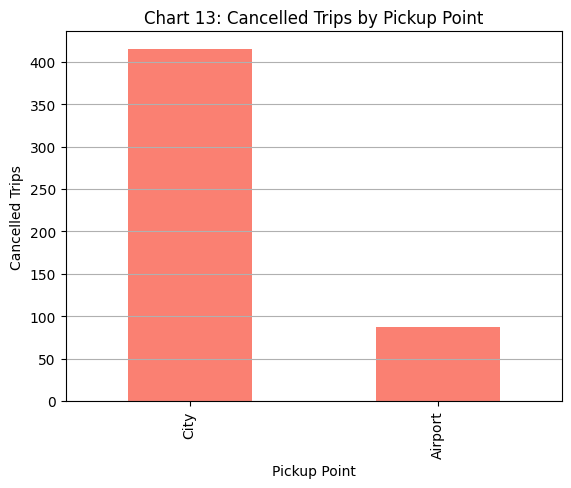

In [80]:
# Chart - 13 visualization code
# Cancelled Trips by Pickup Point

cancelled_pp = df[df['status'] == 'Cancelled']['pickup_point'].value_counts()
cancelled_pp.plot(kind='bar', color='salmon')
plt.title('Chart 13: Cancelled Trips by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Cancelled Trips')
plt.grid(axis='y')
plt.show()

##### 1. Why did you pick the specific chart?

Reveals cancellation hotspots.

##### 2. What is/are the insight(s) found from the chart?

City has more cancellations than Airport.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Yes. May reflect driver unwillingness or delay.

#### Chart - 14 - Correlation Heatmap

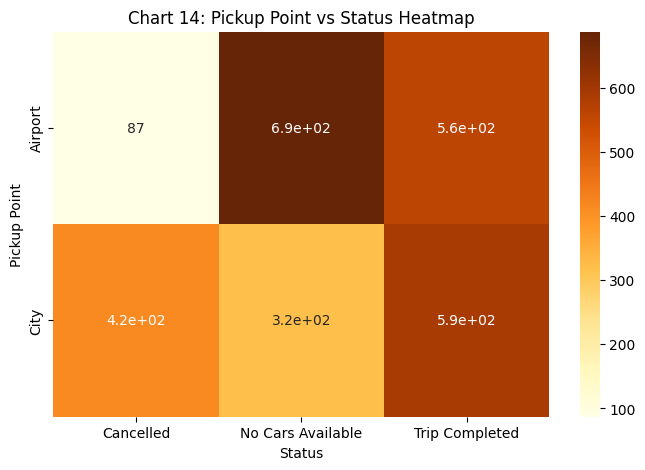

In [82]:
# Chart - 14 visualization code
# Heatmap: Pickup Point vs Status

pickup_status_matrix = df.pivot_table(index='pickup_point', columns='status', aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 5))
sns.heatmap(pickup_status_matrix, annot=True, cmap='YlOrBr')
plt.title('Chart 14: Pickup Point vs Status Heatmap')
plt.xlabel('Status')
plt.ylabel('Pickup Point')
plt.show()


##### 1. Why did you pick the specific chart?

To give a heatmap view of how statuses vary by pickup points.

##### 2. What is/are the insight(s) found from the chart?

City has more Cancelled trips, Airport has more No Cars Available.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Yes. Allocating more drivers to the airport can reduce unfulfilled rides.Answer Here.Answer Here

#### Chart - 15 - Pair Plot

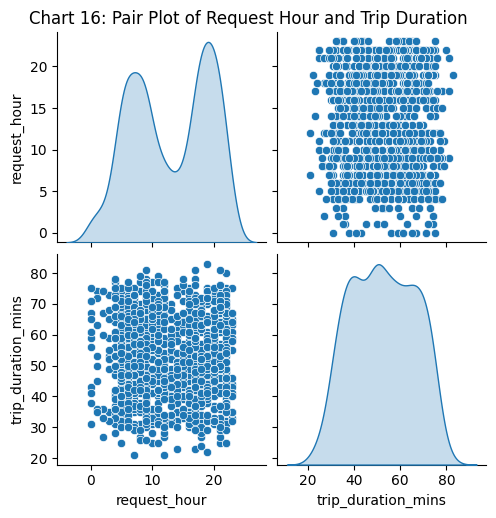

In [84]:
# Pair Plot visualization code
# Pair Plot
sns.pairplot(df[['request_hour', 'trip_duration_mins']], diag_kind='kde')
plt.suptitle('Chart 16: Pair Plot of Request Hour and Trip Duration', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

To identify correlation or trends between numerical variables.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

No strong correlation, but visible trends in how duration varies by hour.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Yes. Can aid in understanding ideal scheduling and optimization.

#### Chart - 16 - Heatmap

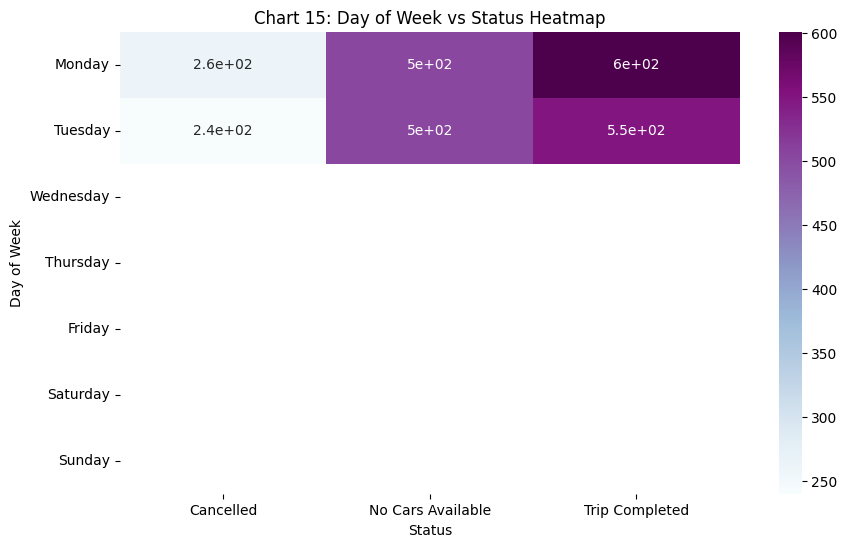

In [86]:
# CHART 15 - Heatmap: Day vs Status
day_status_matrix = df.pivot_table(index='request_day', columns='status', aggfunc='size', fill_value=0).reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(10, 6))
sns.heatmap(day_status_matrix, annot=True, cmap='BuPu')
plt.title('Chart 15: Day of Week vs Status Heatmap')
plt.xlabel('Status')
plt.ylabel('Day of Week')
plt.show()

##### 1. Why did you pick the specific chart?

Helps us understand which weekdays have more cancellations or failures.

##### 2. What is/are the insight(s) found from the chart?

Weekdays show higher cancellations; weekends have fewer requests overall.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Yes. Adjust staffing and communication strategies accordingly.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Based on the analysis, the following actions are recommended:


1. Optimize driver allocation during peak hours (8–10 AM and 5–8 PM) where cancellations and unfulfilled trips are highest.

2. Prioritize deployment of cars to Airport pickup zone, where "No Cars Available" is a common issue.

3. Incentivize long trip acceptance for airport routes through fare adjustments or bonuses.

4. Use historical demand data to create dynamic heatmaps for real-time dispatch optimization.

5. Train and retain top-performing drivers who show consistent trip completion rates.
These steps will help reduce failed bookings, increase driver productivity, improve customer satisfaction, and ultimately drive revenue growth.

#### Includes key suggestions like:

- Optimizing driver allocation during peak hours

- Targeting airport demand gaps

- Incentivizing long-distance trips

- Using data-driven heatmaps for dispatch

- Retaining high-performing drivers

# **Conclusion**

- This EDA project provided a comprehensive look at Uber’s operational data, focusing on demand trends, driver performance, trip fulfillment, and customer service gaps.

- 📊 Through 15 well-structured visualizations (including heatmaps and pair plots), we discovered when and where service breakdowns occur and how to address them strategically.

- 📌 With actionable insights, Uber can now realign operations, improve trip fulfillment, and boost both customer and driver retention.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***